In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

import random
from math import dist

In [2]:
data = make_blobs(
    n_samples=120,
    centers = 3,
    cluster_std = 1.2,
    shuffle = True
)
X = data[0]
y = data[1]

In [3]:
df = pd.DataFrame(
    data=np.concatenate([X,y.reshape(-1,1)], axis=1),
    columns=["feature1", "feature2", "cluster assigned"]
)

<Axes: xlabel='feature1', ylabel='feature2'>

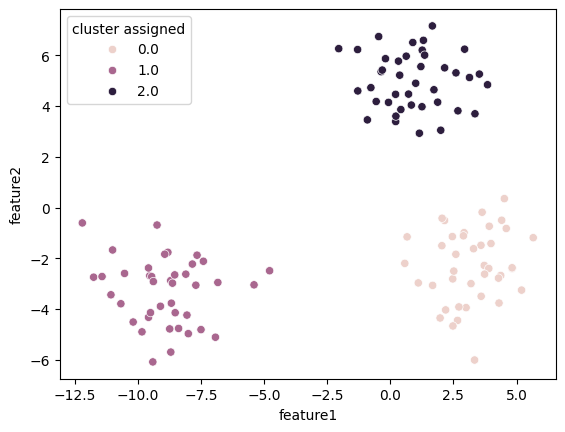

In [4]:
sns.scatterplot(
    data=df, 
    x="feature1", 
    y="feature2",
    hue="cluster assigned"
)

In [5]:
df = df.drop(columns=["cluster assigned"])

In [6]:
df = df.rename(columns={"feature1": "x", "feature2":"y"})

In [7]:
def random_assign(item):
    k=2 # de 0 a 2
    return random.randint(0,k)
df["iteration_label_0"] = df.apply(random_assign, axis=1)

<Axes: xlabel='x', ylabel='y'>

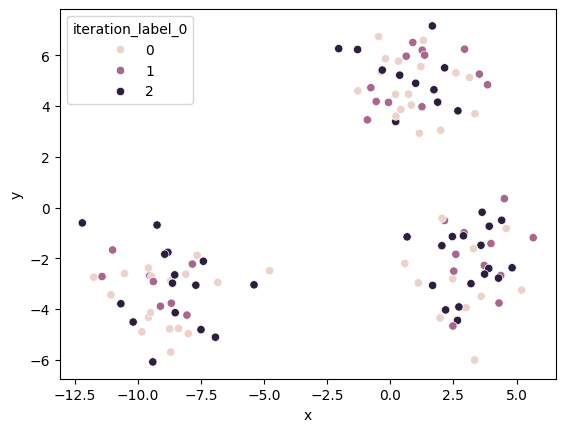

In [8]:
sns.scatterplot(
    data=df, 
    x="x", 
    y="y",
    hue="iteration_label_0"
)

/var/folders/4y/615q_0jx1mb7hglr_6dd6kdm0000gn/T/ipykernel_56950/1295257420.py:21: FutureWarning: The provided callable <function mean at 0x108909940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  centroids = df.groupby(f"iteration_label_{i}").agg(np.mean)


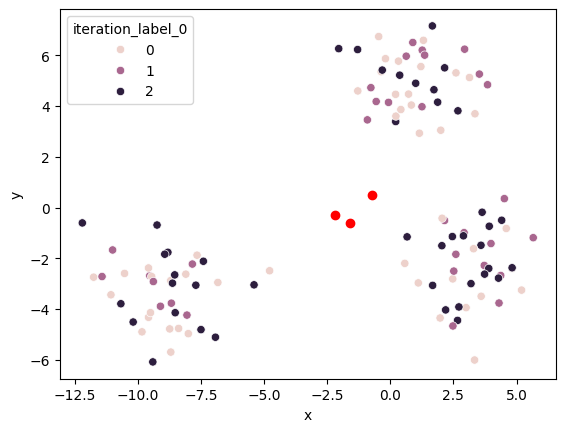

/var/folders/4y/615q_0jx1mb7hglr_6dd6kdm0000gn/T/ipykernel_56950/1295257420.py:21: FutureWarning: The provided callable <function mean at 0x108909940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  centroids = df.groupby(f"iteration_label_{i}").agg(np.mean)


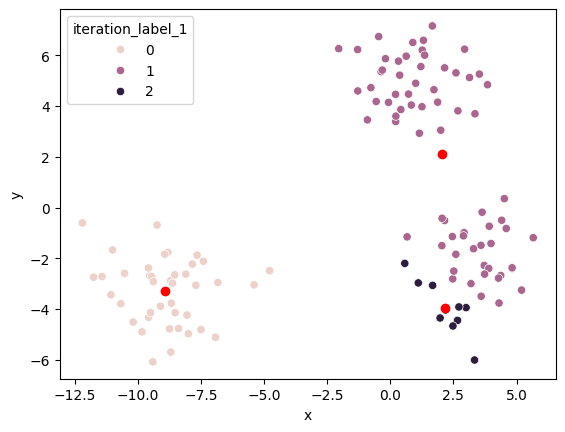

/var/folders/4y/615q_0jx1mb7hglr_6dd6kdm0000gn/T/ipykernel_56950/1295257420.py:21: FutureWarning: The provided callable <function mean at 0x108909940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  centroids = df.groupby(f"iteration_label_{i}").agg(np.mean)


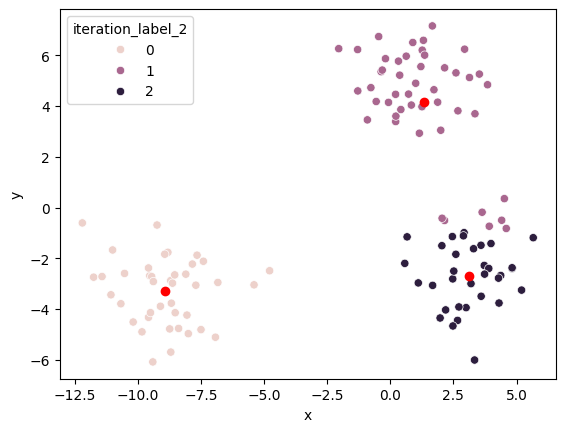

/var/folders/4y/615q_0jx1mb7hglr_6dd6kdm0000gn/T/ipykernel_56950/1295257420.py:21: FutureWarning: The provided callable <function mean at 0x108909940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  centroids = df.groupby(f"iteration_label_{i}").agg(np.mean)


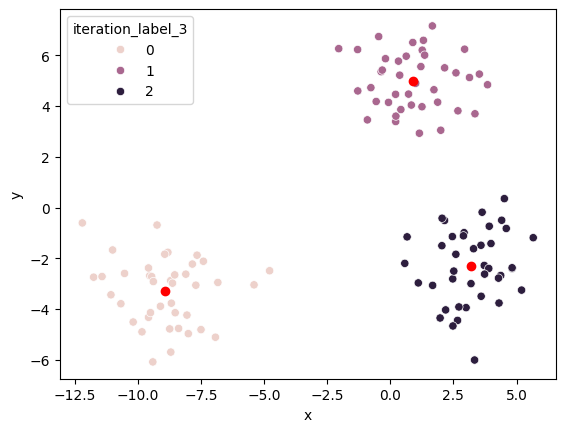

/var/folders/4y/615q_0jx1mb7hglr_6dd6kdm0000gn/T/ipykernel_56950/1295257420.py:21: FutureWarning: The provided callable <function mean at 0x108909940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  centroids = df.groupby(f"iteration_label_{i}").agg(np.mean)


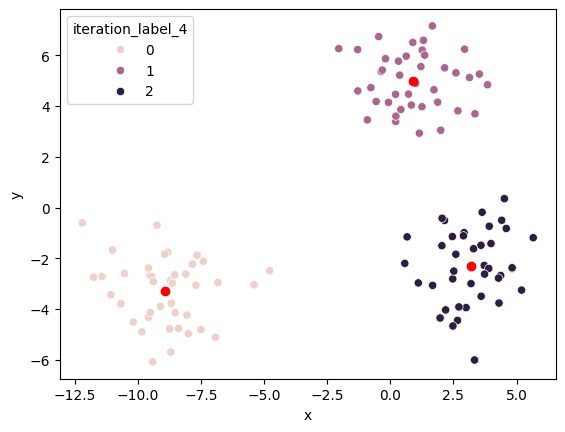

/var/folders/4y/615q_0jx1mb7hglr_6dd6kdm0000gn/T/ipykernel_56950/1295257420.py:21: FutureWarning: The provided callable <function mean at 0x108909940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  centroids = df.groupby(f"iteration_label_{i}").agg(np.mean)


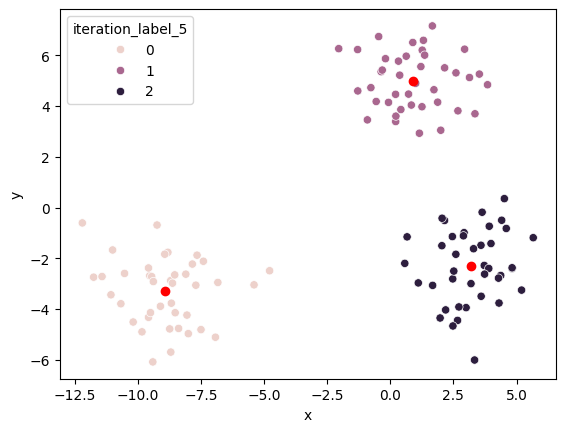

/var/folders/4y/615q_0jx1mb7hglr_6dd6kdm0000gn/T/ipykernel_56950/1295257420.py:21: FutureWarning: The provided callable <function mean at 0x108909940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  centroids = df.groupby(f"iteration_label_{i}").agg(np.mean)


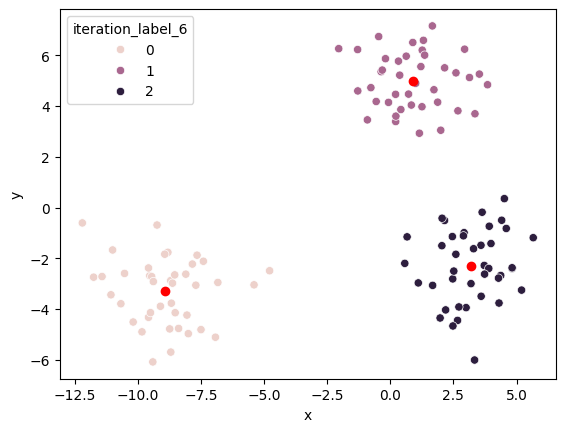

/var/folders/4y/615q_0jx1mb7hglr_6dd6kdm0000gn/T/ipykernel_56950/1295257420.py:21: FutureWarning: The provided callable <function mean at 0x108909940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  centroids = df.groupby(f"iteration_label_{i}").agg(np.mean)


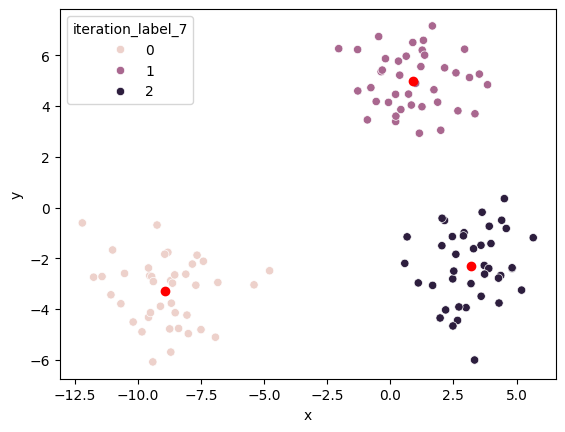

/var/folders/4y/615q_0jx1mb7hglr_6dd6kdm0000gn/T/ipykernel_56950/1295257420.py:21: FutureWarning: The provided callable <function mean at 0x108909940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  centroids = df.groupby(f"iteration_label_{i}").agg(np.mean)


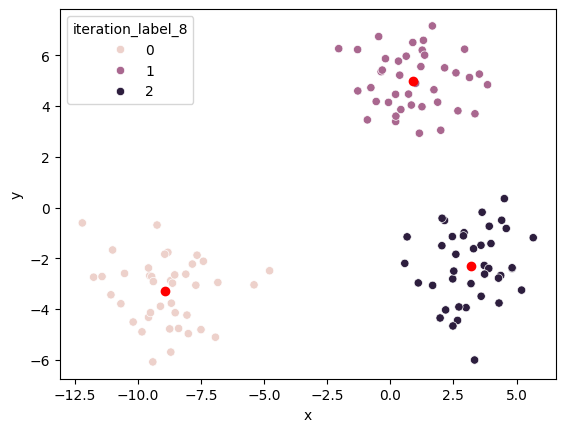

/var/folders/4y/615q_0jx1mb7hglr_6dd6kdm0000gn/T/ipykernel_56950/1295257420.py:21: FutureWarning: The provided callable <function mean at 0x108909940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  centroids = df.groupby(f"iteration_label_{i}").agg(np.mean)


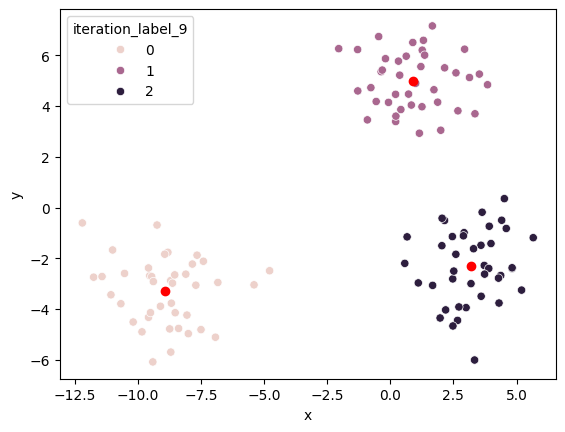

In [25]:
def assign_new_cluster(observation):
    observation_x, observation_y = observation["x"], observation["y"]
    point = (observation_x, observation_y)
    dists = []
    for index, elem in centroids.iterrows():
        centroid_x, centroid_y = elem["x"], elem["y"]
        centroid = (centroid_x, centroid_y)
    
        dists.append(dist(centroid,point))
        
    cluster_assigned_for_observation = np.argmin(dists)
    return cluster_assigned_for_observation

for i in range(10):
    g = sns.scatterplot(
        data=df, 
        x="x", 
        y="y",
        hue=f"iteration_label_{i}"
    )
    centroids = df.groupby(f"iteration_label_{i}").agg(np.mean)
    
    for index, elem in centroids.iterrows():
        centroid_x, centroid_y = elem["x"], elem["y"]
        g.plot(centroid_x, centroid_y,'ro') 
    plt.show()
    
    df[f"iteration_label_{i + 1}"] = df.apply(assign_new_cluster, axis=1)

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[["x", "y"]])

KMeans(n_clusters=3)

In [31]:
df["cluster_assigned"] = kmeans.predict(df[["x", "y"]])

<Axes: xlabel='x', ylabel='y'>

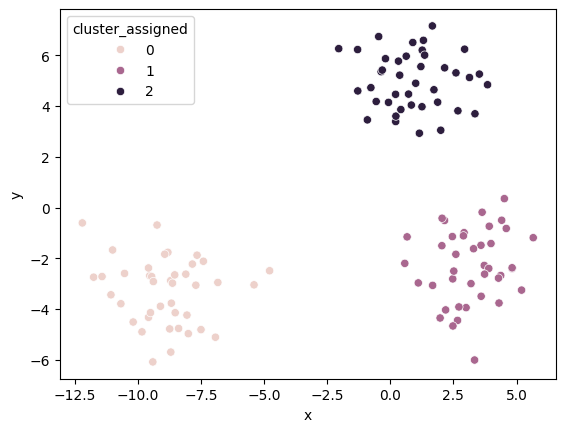

In [32]:
sns.scatterplot(
        data=df, 
        x="x", 
        y="y",
        hue="cluster_assigned"
)